In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('bike_sharing.csv')

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
data['count'].describe()

count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: count, dtype: float64

In [ ]:
# Convert datetime column to datetime type
data['datetime'] = pd.to_datetime(data['datetime'])

In [ ]:
# Extract hour, day, month, and year from datetime
data['hour'] = data['datetime'].dt.hour
data['day'] = data['datetime'].dt.day
data['month'] = data['datetime'].dt.month
data['year'] = data['datetime'].dt.year

In [ ]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,month,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1,1,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,1,2011
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,1,1,2011
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,1,1,2011
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,1,1,2011


In [ ]:
data["year"].unique()

array([2011, 2012], dtype=int32)

In [ ]:
# Convert categorical variables to 'category' data type
categorical_columns = ['season', 'holiday', 'workingday', 'weather']
for col in categorical_columns:
    data[col] = data[col].astype('category')

In [ ]:
# Verify the conversion
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  category      
 3   workingday  10886 non-null  category      
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  hour        10886 non-null  int32         
 13  day         10886 non-null  int32         
 14  month       10886 non-null  int32         
 15  year        10886 non-null  int32         
dtypes: category(4), dateti

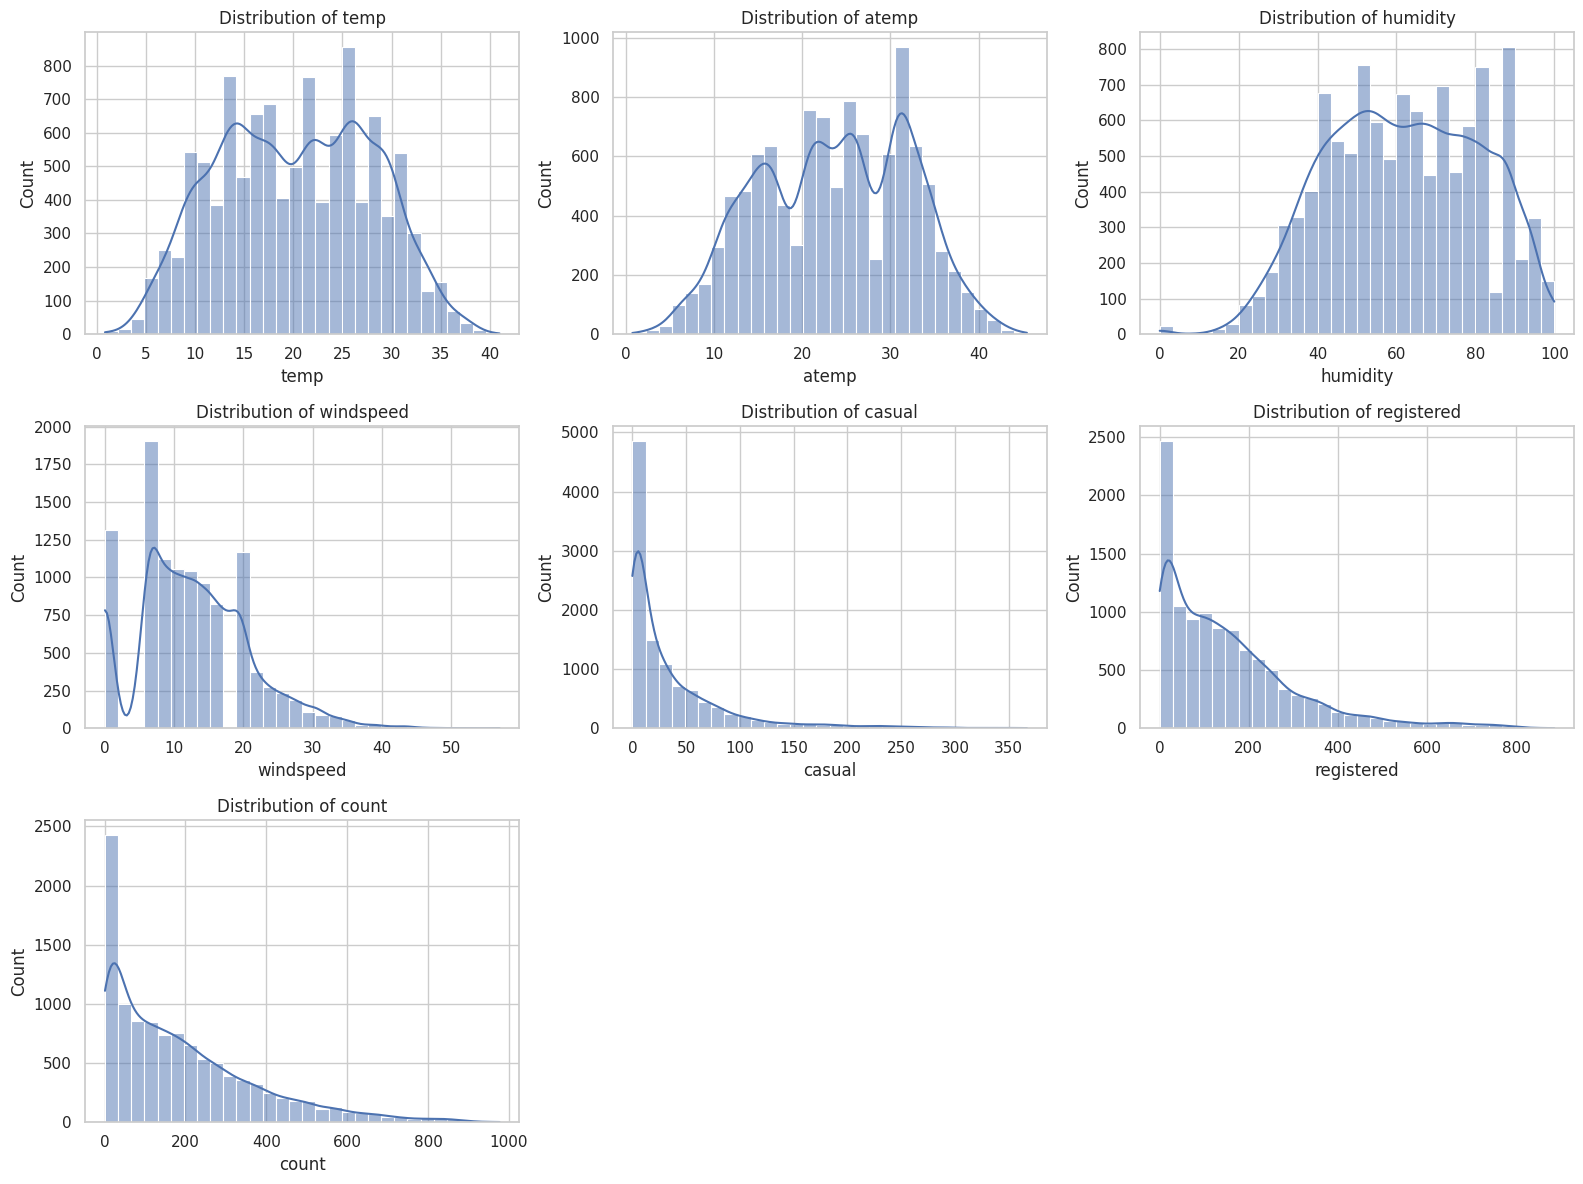

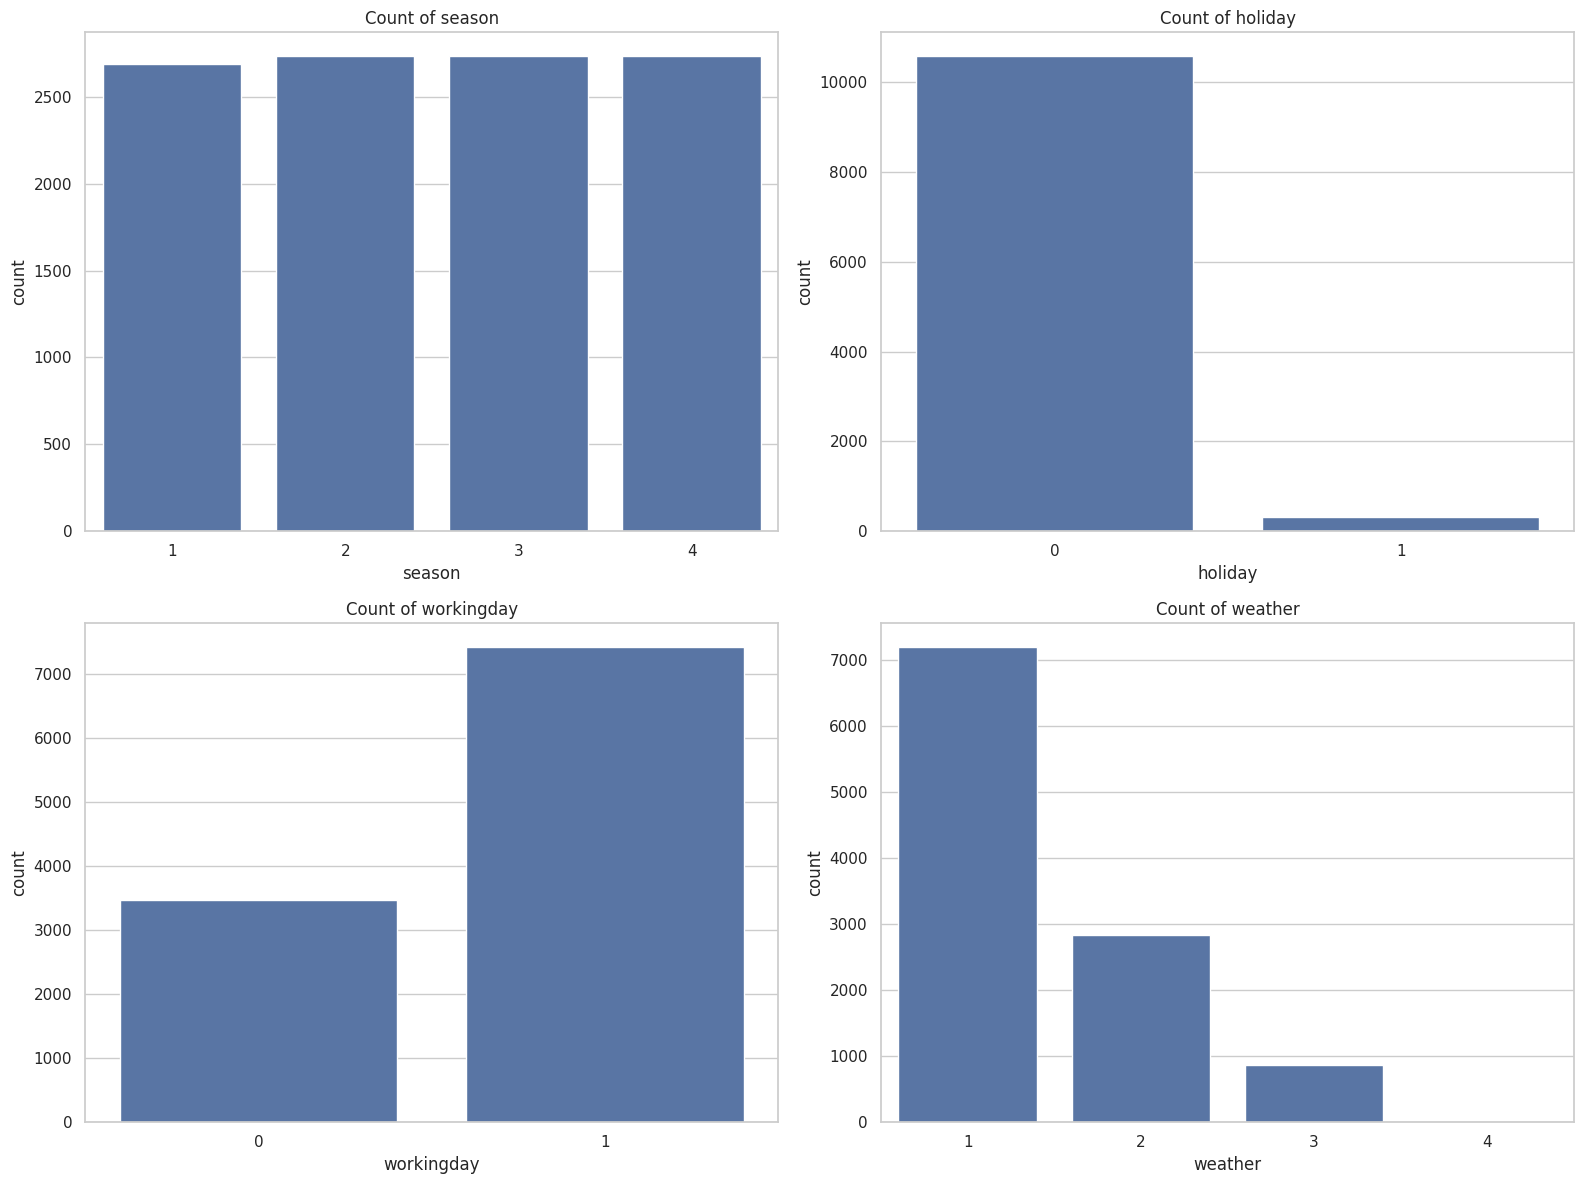

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the visualizations
sns.set(style="whitegrid")

# Continuous variables
continuous_vars = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

# Plot distribution for continuous variables
plt.figure(figsize=(16, 12))
for i, var in enumerate(continuous_vars, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[var], kde=True, bins=30)
    plt.title(f'Distribution of {var}')
plt.tight_layout()
plt.savefig('histograms.png')
plt.show()

# Categorical variables
categorical_vars = ['season', 'holiday', 'workingday', 'weather']

# Plot bar plots for categorical variables
plt.figure(figsize=(16, 12))
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=data, x=var)
    plt.title(f'Count of {var}')
plt.tight_layout()
plt.savefig('barplots.png')
plt.show()


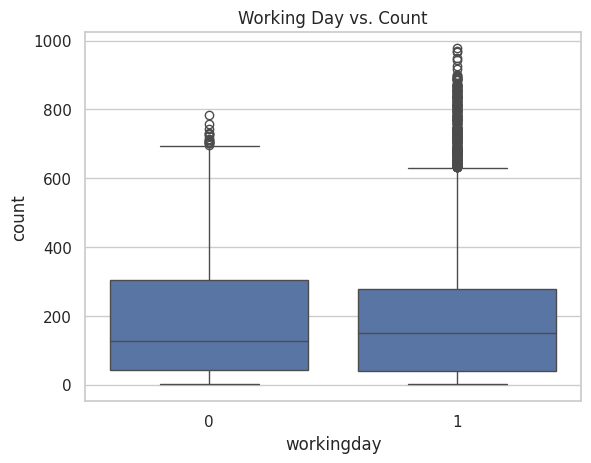

In [ ]:
sns.boxplot(x='workingday', y='count', data=data)
plt.title('Working Day vs. Count')
plt.savefig('WorkingdayVsCount.png')
plt.show()

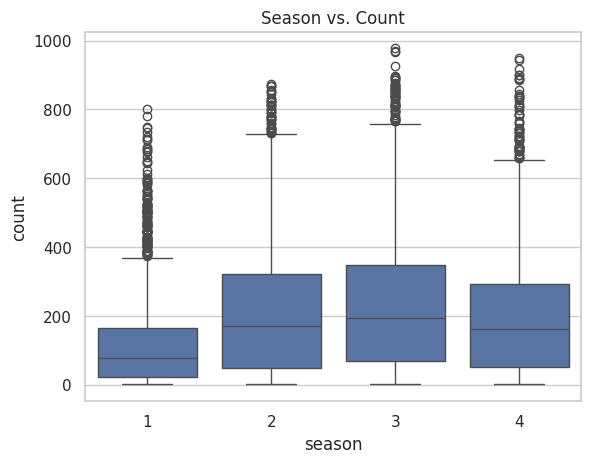

In [ ]:
sns.boxplot(x='season', y='count', data=data)
plt.title('Season vs. Count')
plt.savefig('SeasonvsCount.png')
plt.show()

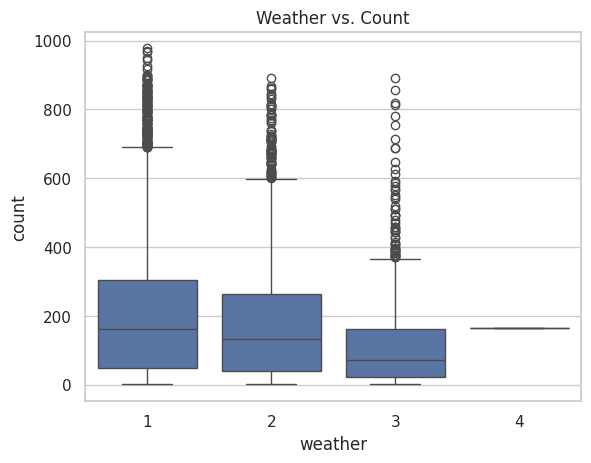

In [ ]:
sns.boxplot(x='weather', y='count', data=data)
plt.title('Weather vs. Count')
plt.savefig('WeatherVsCount.png')
plt.show()

# Hypothesis Testing

In [ ]:
# 2-Sample T-Test for Working Day Effect
from scipy.stats import ttest_ind
ttest_ind(data[data['workingday'] == 1]['count'], data[data['workingday'] == 0]['count'])

TtestResult(statistic=1.2096277376026694, pvalue=0.22644804226361348, df=10884.0)

Since the p-value (0.2264) is greater than the commonly used significance level (alpha = 0.05), we fail to reject the null hypothesis. This means there is not enough evidence to suggest that the number of electric cycles rented significantly differs between working days and non-working days.

In [ ]:
# ANOVA for Season Effects
from scipy.stats import f_oneway
f_oneway(data[data['season'] == 1]['count'], data[data['season'] == 2]['count'],
         data[data['season'] == 3]['count'], data[data['season'] == 4]['count'])

F_onewayResult(statistic=236.94671081032106, pvalue=6.164843386499654e-149)

In [ ]:
# ANOVA for Weather Effects
f_oneway(data[data['weather'] == 1]['count'], data[data['weather'] == 2]['count'],
         data[data['weather'] == 3]['count'], data[data['weather'] == 4]['count'])

F_onewayResult(statistic=65.53024112793271, pvalue=5.482069475935669e-42)

In [ ]:
# Chi-Square Test for Weather and Season Dependence

from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(data['weather'], data['season'])
chi2_contingency(contingency_table)

Chi2ContingencyResult(statistic=49.15865559689363, pvalue=1.5499250736864862e-07, dof=9, expected_freq=array([[1.77454639e+03, 1.80559765e+03, 1.80559765e+03, 1.80625831e+03],
       [6.99258130e+02, 7.11493845e+02, 7.11493845e+02, 7.11754180e+02],
       [2.11948742e+02, 2.15657450e+02, 2.15657450e+02, 2.15736359e+02],
       [2.46738931e-01, 2.51056403e-01, 2.51056403e-01, 2.51148264e-01]]))